<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




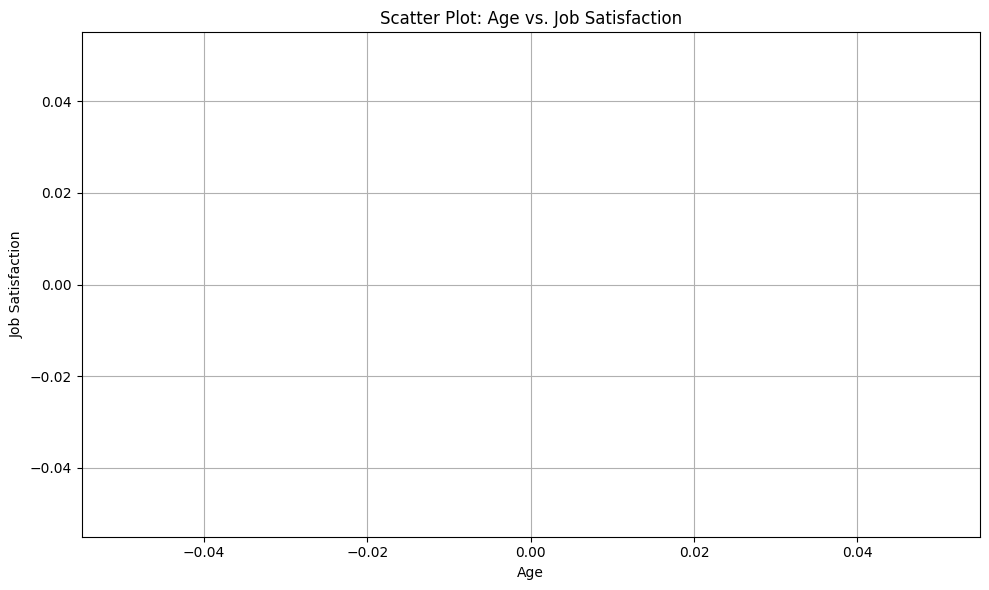

In [3]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query Age and JobSat
query = """
SELECT Age, JobSat
FROM main
WHERE Age IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean Age column
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna()

# Optional: Remove outliers (e.g., top 1% ages)
df = df[df['Age'] < df['Age'].quantile(0.99)]

# Step 4: Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['JobSat'], alpha=0.5, color='teal')
plt.title("Scatter Plot: Age vs. Job Satisfaction")
plt.xlabel("Age")
plt.ylabel("Job Satisfaction")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Close DB connection
conn.close()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


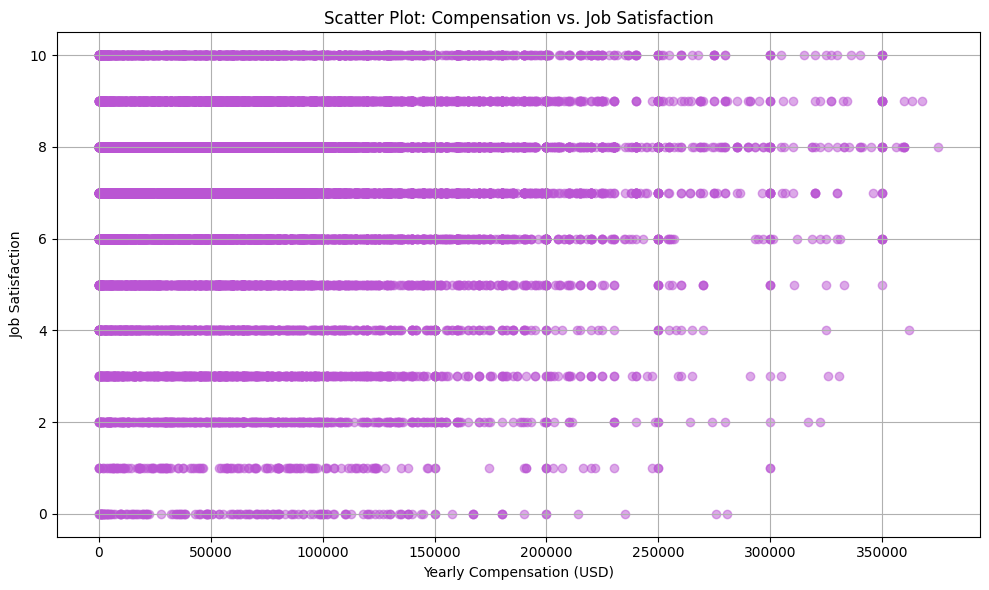

In [4]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query compensation and satisfaction
query = """
SELECT ConvertedCompYearly, JobSat
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean compensation column
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna()

# Optional: Remove top 1% of high compensation values for better visibility
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Step 4: Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSat'], alpha=0.5, color='mediumorchid')
plt.title("Scatter Plot: Compensation vs. Job Satisfaction")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Close connection
conn.close()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


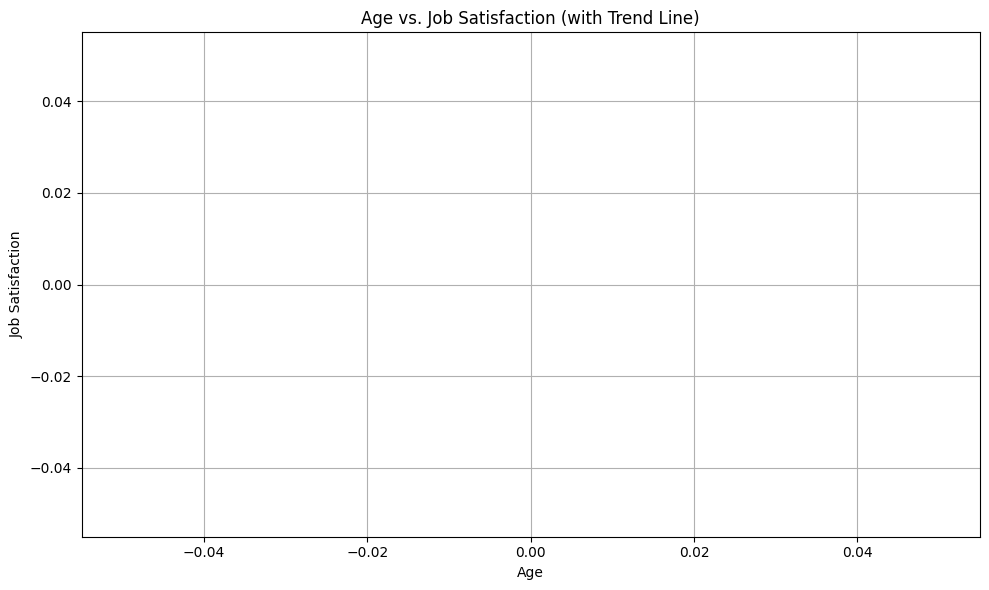

In [5]:
## Write your code here
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite DB
conn = sqlite3.connect("survey-results-public.sqlite")

# Query Age and Job Satisfaction
query = """
SELECT Age, JobSat
FROM main
WHERE Age IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Clean Age column
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna()

# Optional: remove top 1% ages
df = df[df['Age'] < df['Age'].quantile(0.99)]

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='JobSat', data=df, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title("Age vs. Job Satisfaction (with Trend Line)")
plt.xlabel("Age")
plt.ylabel("Job Satisfaction")
plt.tight_layout()
plt.grid(True)
plt.show()

conn.close()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


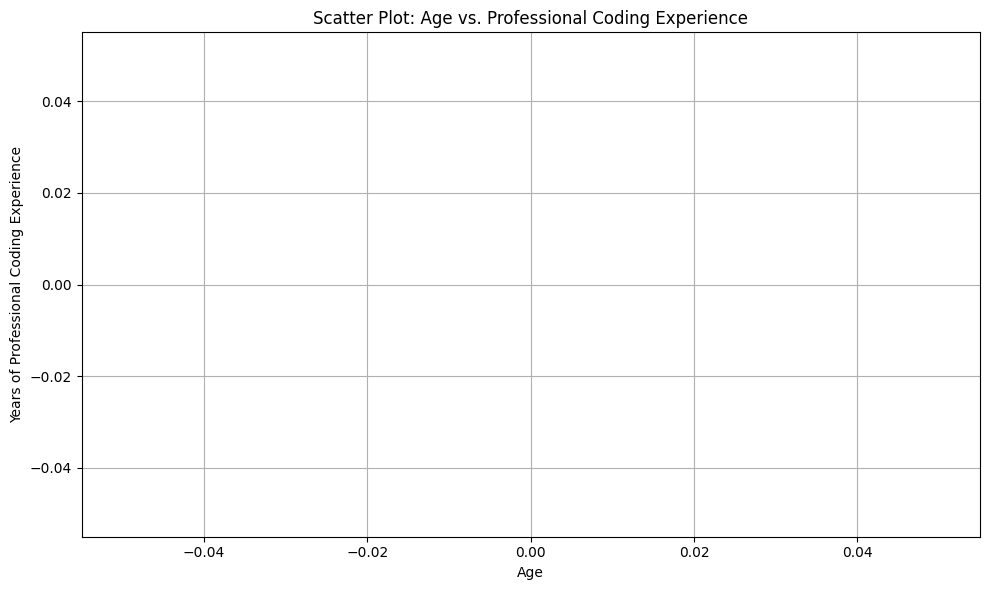

In [6]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query Age and YearsCodePro
query = """
SELECT Age, YearsCodePro
FROM main
WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean and convert values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop any rows with NaNs
df = df.dropna()

# Optional: remove outliers for visibility
df = df[(df['Age'] < df['Age'].quantile(0.99)) & (df['YearsCodePro'] < df['YearsCodePro'].quantile(0.99))]

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['YearsCodePro'], alpha=0.5, color='dodgerblue')
plt.title("Scatter Plot: Age vs. Professional Coding Experience")
plt.xlabel("Age")
plt.ylabel("Years of Professional Coding Experience")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Close connection
conn.close()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


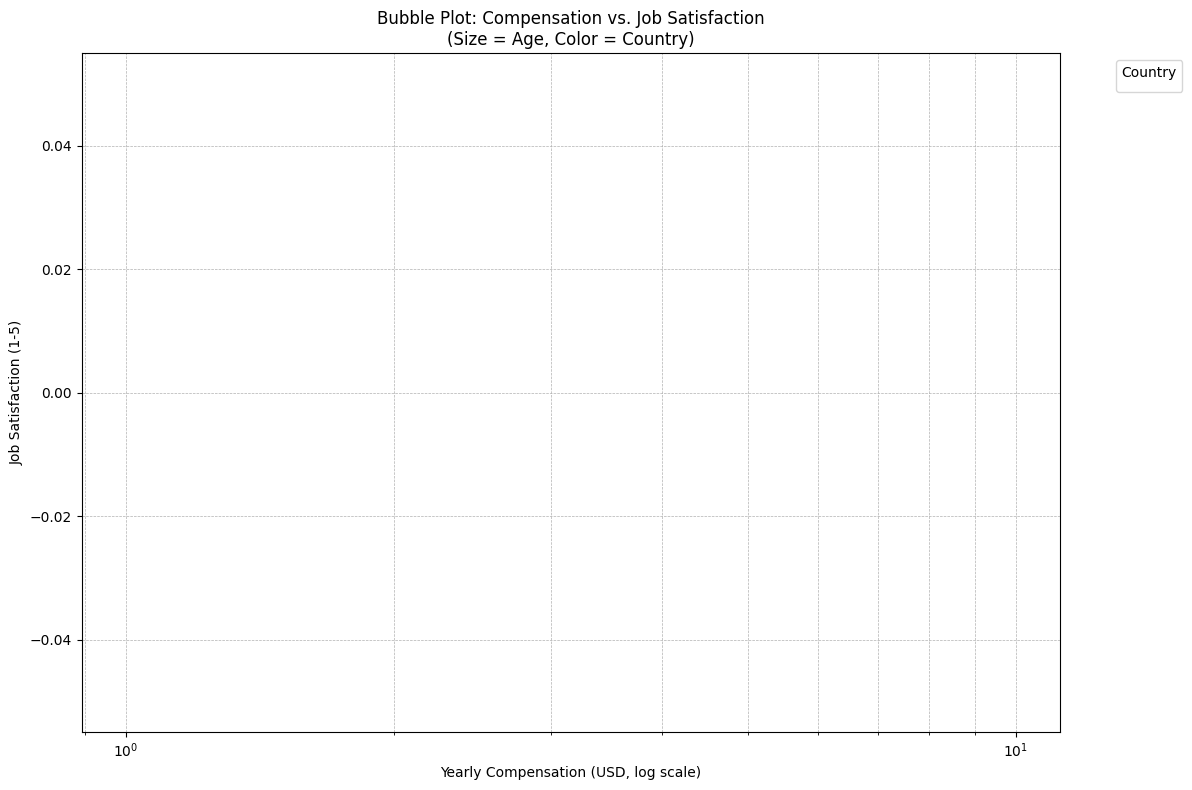

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query relevant columns
query = """
SELECT ConvertedCompYearly, JobSat, Age, Country
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSat IS NOT NULL AND Age IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean data
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna()

# Step 4: Optional filters (e.g., Age between 20 and 60, JobSat 1–5)
df = df[
    (df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)) &
    (df['Age'] >= 20) & (df['Age'] <= 60) &
    (df['JobSat'] >= 1) & (df['JobSat'] <= 5)
]

# Step 5: Limit to top 5 most common countries
top_countries = df['Country'].value_counts().nlargest(5).index
df = df[df['Country'].isin(top_countries)]

# Step 6: Encode country into color
country_colors = {country: i for i, country in enumerate(top_countries)}
df['ColorIndex'] = df['Country'].map(country_colors)

# Step 7: Scale bubble size by age
bubble_size = df['Age'] * 2

# Step 8: Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df['ConvertedCompYearly'],
    y=df['JobSat'],
    s=bubble_size,
    c=df['ColorIndex'],
    cmap='tab10',  # You can use 'tab20', 'Set3', etc.
    alpha=0.6,
    edgecolors='k',
    linewidths=0.5
)

# Log scale for compensation (X-axis)
plt.xscale('log')

# Labels & title
plt.title("Bubble Plot: Compensation vs. Job Satisfaction\n(Size = Age, Color = Country)")
plt.xlabel("Yearly Compensation (USD, log scale)")
plt.ylabel("Job Satisfaction (1-5)")

# Color legend
handles = [plt.Line2D([], [], marker='o', linestyle='', color=plt.cm.tab10(i), label=country, markersize=10) for i, country in enumerate(top_countries)]
plt.legend(handles=handles, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Close DB connection
conn.close()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


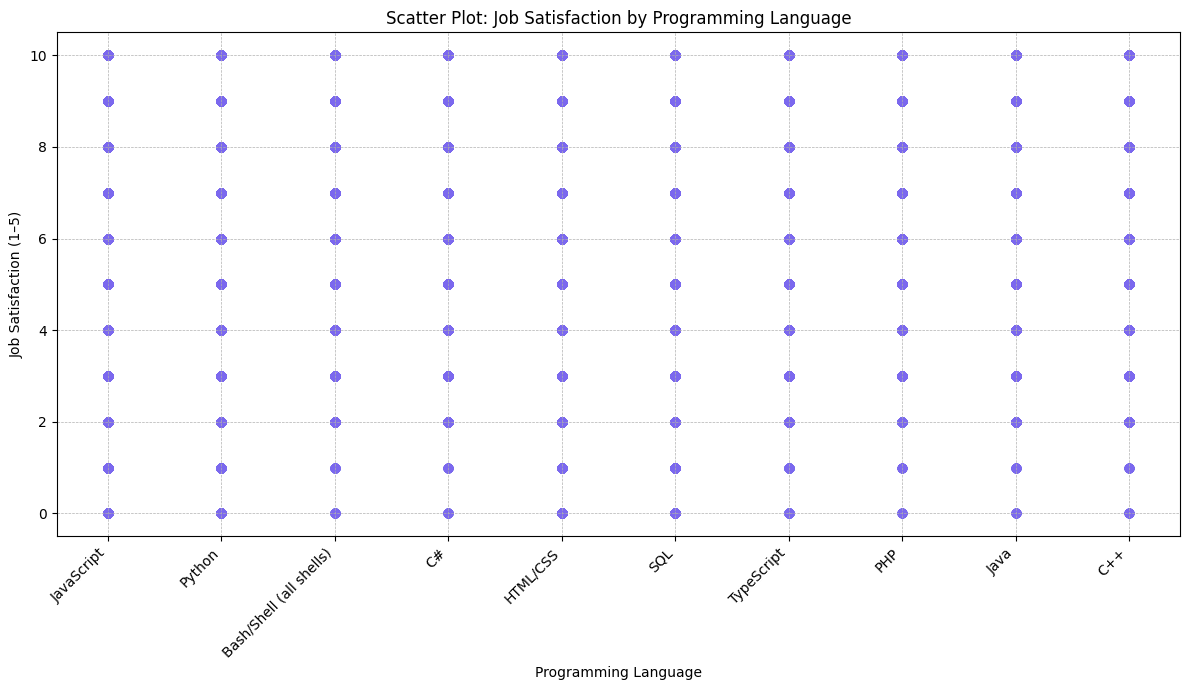

In [9]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite DB
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query Language and Job Satisfaction
query = """
SELECT LanguageHaveWorkedWith, JobSat
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean and transform data
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna()

# Step 4: Split multiple languages into separate rows
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageHaveWorkedWith')
df_exploded.rename(columns={'LanguageHaveWorkedWith': 'Language'}, inplace=True)

# Step 5: Filter top 10 most common languages
top_languages = df_exploded['Language'].value_counts().nlargest(10).index
df_top = df_exploded[df_exploded['Language'].isin(top_languages)]

# Step 6: Plot
plt.figure(figsize=(12, 7))
plt.scatter(df_top['Language'], df_top['JobSat'], alpha=0.3, color='mediumslateblue')
plt.title("Scatter Plot: Job Satisfaction by Programming Language")
plt.xlabel("Programming Language")
plt.ylabel("Job Satisfaction (1–5)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Step 7: Close DB
conn.close()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


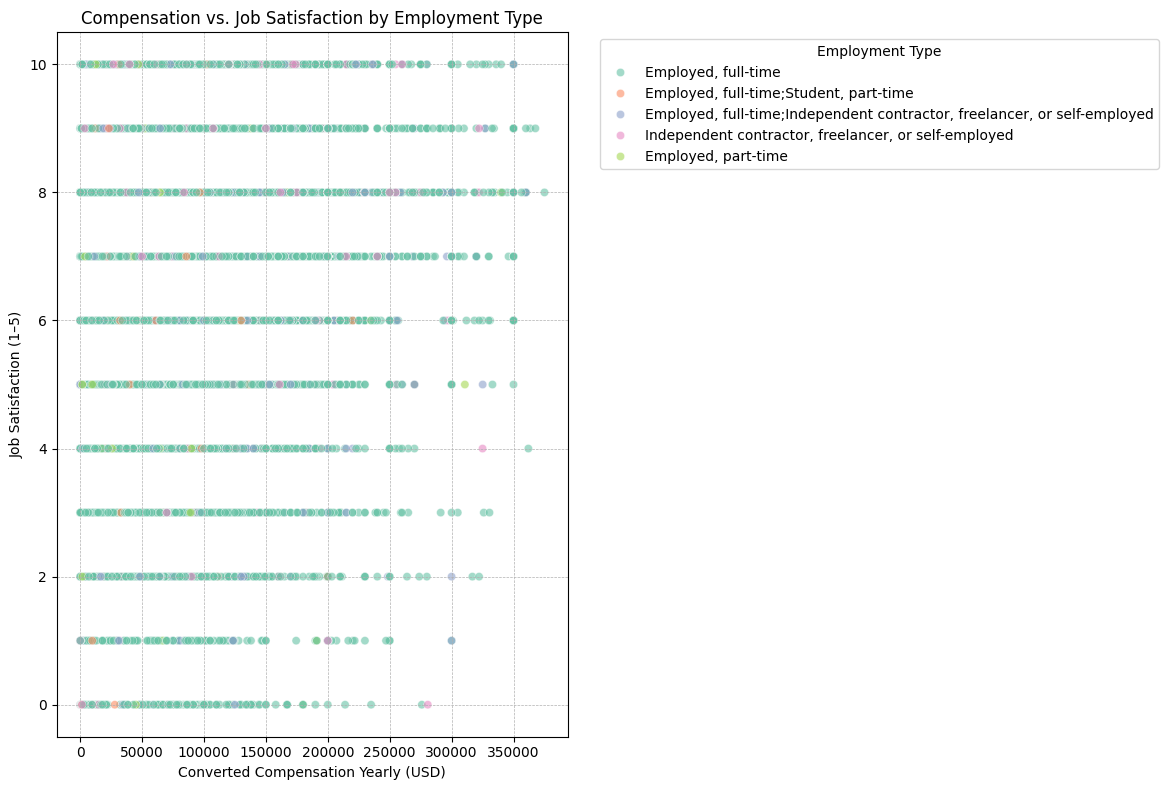

In [10]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to DB
conn = sqlite3.connect("survey-results-public.sqlite")

# Step 2: Query data
query = """
SELECT ConvertedCompYearly, JobSat, Employment
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSat IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean data
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna()

# Step 4: Remove extreme compensation outliers
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Optional: filter to most common employment types (top 5)
top_employment = df['Employment'].value_counts().nlargest(5).index
df = df[df['Employment'].isin(top_employment)]

# Step 5: Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='ConvertedCompYearly',
    y='JobSat',
    hue='Employment',
    palette='Set2',
    alpha=0.6
)

plt.title("Compensation vs. Job Satisfaction by Employment Type")
plt.xlabel("Converted Compensation Yearly (USD)")
plt.ylabel("Job Satisfaction (1–5)")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Close DB
conn.close()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [13]:
pip install plotly

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
    ----------------

In [4]:
!pip install --upgrade nbformat


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sqlite3
import pandas as pd
import plotly.express as px

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Query the data
query = """
SELECT Age, YearsCodePro, Country
FROM main
WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Clean up numeric columns
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna()

# Create age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Filter to top 5 countries
top_countries = df['Country'].value_counts().nlargest(5).index
df = df[df['Country'].isin(top_countries)]

# Build interactive scatter plot
fig = px.scatter(
    df,
    x="Age",
    y="YearsCodePro",
    color="Country",
    symbol="AgeGroup",
    title="Work Experience vs. Age Group by Country",
    labels={"Age": "Age", "YearsCodePro": "Years of Professional Coding"},
    hover_data=["Country", "Age", "YearsCodePro", "AgeGroup"],
    opacity=0.6
)

fig.update_layout(
    legend_title="Country",
    width=1000,
    height=600
)

fig.show()

# Close DB
conn.close()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
